<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/actuales/ICDIC_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 3: Modelos de Regresión
**Objetivos:** Con este trabajo práctico se busca que los alumnos comiencen a familiarizarse con las herramientas de inferencia estadística para la obtención de los parámetros de un modelo, pero ahora condicionado a a variables predictoras. Esto se hará a partir de 3 ejercicios de aplicación profesional.

**Librerías:** En este trabajo se utilizará

*   Numpy: matemática básica y definición de matrices y vectores; simulación de variables aleatorias
*   Seaborn: construcción de gráficos
*   Bambi: Librería basada en PyMC para la inferencia estadística utilizando cadenas de Markov

También necesitaremos de la librería ArviZ para ver los resultados de nuestra inferencia, al igual que Numpy.






In [ ]:
# Instalación e import de Bambi
try:
  import bambi as bmb
except:
  !pip install bambi
  import bambi as bmb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
import io

Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Estimación de los esfuerzos de los cables del Puente de la Mujer

En este primer ejercicio, vamos concentrarnos únicamente en lo que hace a la extracción de conclusiones a partir del modelo y sus resultados, y no necesariamente a su evaluación o la selección del modelo más apropiado.

### Introducción

En el año 2019 se realizaron ensayos en el Puente de la Mujer, Buenos Aires, para determinar las tensiones en los cables que lo decoran. Para ello, se generaba una acción impulsiva en los mismos con un martillo, registrándose las aceleraciones resultantes (el ensayo fue repetido con el puente en su configuración abierta y cerrada al paso de embarcaciones). Luego, a partir de la Transformada de Fourier y un algoritmo desarrollado específicamente para tal fin, se encontraron las frecuencias naturales $f_{n}$ y el número de modo asociado $n$.

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1DD-Fy7vanfjr94VCq0zCaBI0JYlDUJMK'; width= 50%;
  height= auto />
<figcaption>Registro de aceleraciones del Cable 14 con puente en configuración cerrada</figcaption></center>
</figure>

El dataset presente a continuación tiene para todos los cables de puente y para ambas configuraciones de servicio, todos los valores de $n$ y $f_{n}$ encontrados a partir de los ensayos.

### Carga del Dataset



In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Cables.csv to Cables.csv


In [ ]:
#Se crea un DataFrame
df_cables = pd.read_csv(io.BytesIO(uploaded['Cables.csv']))
df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m
0,5.027848,1,1,C,9.821,3.6
1,10.131991,2,1,C,9.821,3.6
2,15.548943,3,1,C,9.821,3.6
3,21.377890,4,1,C,9.821,3.6
4,27.748531,5,1,C,9.821,3.6


Como puede ver, el dataset tiene los siguientes datos:
- $n$ : n
- $L$ : long_m
- $\mu$ : masa_p_long_kg_m
- $f_{n}$ : fn_Hz
- Nro. de Cable: N_Cable (del 1 al 18)
- Condición del Puente: C (Cerrado), A (Abierto)

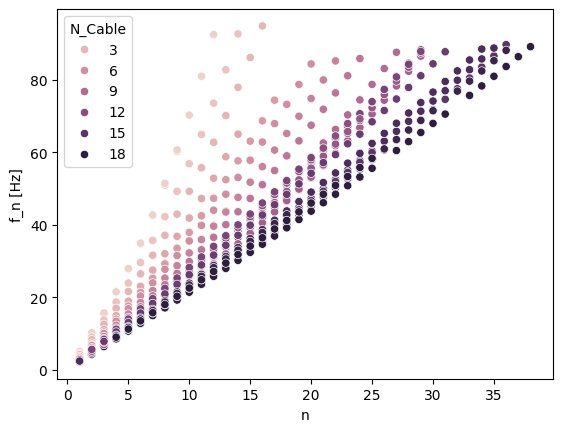

In [ ]:
sns.scatterplot(df_cables,x='n',y='fn_Hz',hue='N_Cable')
plt.xlabel('n')
plt.ylabel('f_n [Hz]')
plt.show()

Los datos parecieran tener cierta forma de recta, ¿no? A simple vista por lo menos. Y esas rectas dependen del número de cable.

### Nuestro Primer Modelo de Regresión Lineal

Hagamos un ajuste para uno de todos los Cables. Tomemos, como referencia, el Cable 14. Construyamos el modelo más "sencillo" de todos de regresión lineal.

$$f|n \sim N(\mu=a+b\cdot n,\sigma)$$

#### Actividad 1

**Actividad**: Cargue en `Bambi` el modelo de regresión propuesto. Muestre claramente las distribuciones a priori adoptadas y la evaluación de la inferencia/convergencia.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model0 =
################################################################################

model0.build()
model0.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results0 =
################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Distribuciones posteriores
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Hacer predicciones con mi modelo
# CODIGO DEL ALUMNO ############################################################
model0.predict(results0,kind='pps')
################################################################################

results0

#### Actividad 2

Veamos ahora cuál fue el resultado de nuestra inferencia, y si se parece a los datos.

**Actividad**: Muestre en un mismo gráfico
- Los Datos
- La curva posterior predictiva del valor medio de $f(n)$
- El intervalo de confianza 90% para el valor medio
- El intervalo de confianza 90% para una nueva observación de $f(n)$

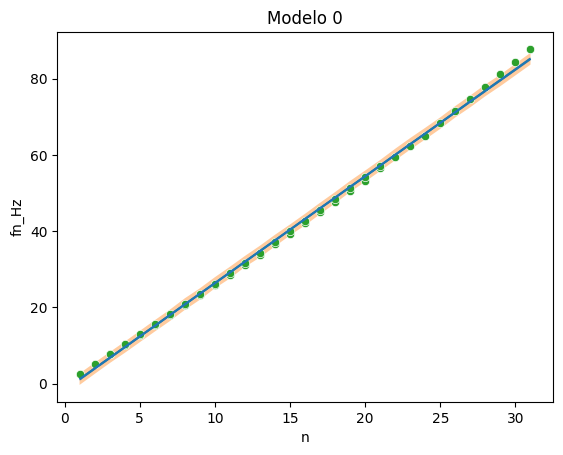

In [ ]:
# CODIGO DEL ALUMNO ############################################################




################################################################################
plt.show()

#### Actividad 3

A continuación se presentan dos gráficos para el análisis de los residuos. El primero presenta la distribución de probabilidad de los residuos. El segundo, la estimación del valor medio del residuo y su desvío para cada punto de la recta (es decir, el primer gráfico en función de N)

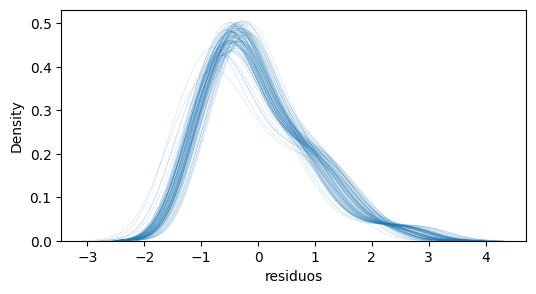

In [ ]:
y_obs = df_cables[df_cables['N_Cable']==14].fn_Hz

fig, ax = plt.subplots( figsize=(6,3) )
for i in range(0,100):
  mu_pred = results0.posterior["Intercept"].sel(chain=0,draw=i).values\
  +results0.posterior["n"].sel(chain=0,draw=i).values * df_cables[df_cables['N_Cable']==14].n
  residuals = y_obs - mu_pred
  sns.kdeplot( residuals, ax=ax, linewidth=.3, alpha=.3, color='C0' )

ax.set_xlabel('residuos')
plt.show()

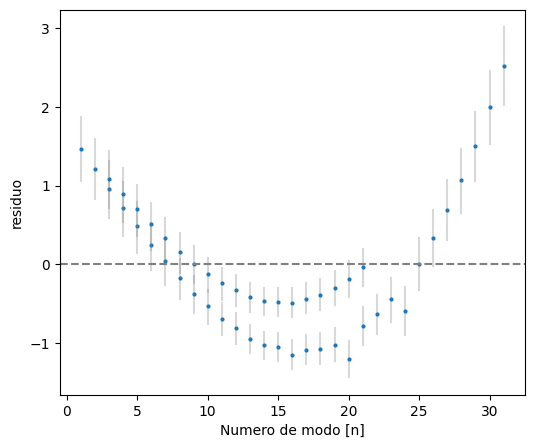

In [ ]:
y_obs = (df_cables[df_cables['N_Cable']==14].fn_Hz).to_numpy()
xx = (df_cables[df_cables['N_Cable']==14].n).to_numpy()

fig, ax = plt.subplots( figsize=(6,5) )

for i in range(len(xx)):
  mu_pred = results0.posterior["Intercept"].sel(chain=0,draw=slice(1,150)).values\
  +results0.posterior["n"].sel(chain=0,draw=slice(1,150)).values * xx[i]
  residuals = y_obs[i] - mu_pred
  quantiles = np.quantile(residuals, 0.05), np.quantile(residuals, 0.95)
  ax.plot( [xx[i],xx[i]], quantiles, color='gray', alpha=.3 )
  ax.plot( xx[i], residuals.mean(), 'o', color='C0', markersize=2)

ax.axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
ax.set_ylabel('residuo')
ax.set_xlabel('Numero de modo [n]')
plt.show()

**Actividad**: ¿Puede afirmar que los desvíos siguen la siguiente distribución

$$\sigma \sim N(0,s)$$

con $s$ constante? ¿Por qué? Caso contrario, aclare dónde nota diferencias. En conjunto con la actividad anterior, ¿qué modelo pareciera que podría ser mejor?

**Su respuesta**:

### Teoría de Vibraciones en Cables (Construcción de Nuevas Variables)

La teoría de vibraciones en cables indica que existe una relación especial entre la frecuencia natural y el modo de vibración. Si lo hubiesemos sabido, ¡no hubiesemos probado con una recta!

$$ f_{n}= \sqrt{\frac{T}{4L^{2}\mu}n^{2}+\frac{EI\pi^{2}}{4L^{4}\mu}n^{4}}  $$

La ecuación es algo fea, ¿no? Yo tranquilamente podría ajustar esta curva la cual se asemeja a una parábola. ¡Sin embargo, reescribiendo las variables factible de transformarlo a una recta!

Trabajando algebraicamente, es factible despejar la tensión del cable $T$:

$$ T = 4 L ^{2} \left( \frac{f_n}{n}\right) ^{2} \mu - \left( \frac{EI}{L ^{2}}\right) ( n \pi ) ^{2}  $$

Donde $L$ es la longitud del cable, $\mu$ su masa por unidad de longitud, y $EI$ es la rigidez a flexión del cable. Reordenando la expresión de arriba, se tiene:

$$ 4 L ^{2}  \mu\ \left( \frac{f_n}{n}\right) ^{2} = T + EI\ \left( \frac{n \pi}{L}\right)^{2}  $$

Por lo que se puede analizar los datos obtenidos del ensayo a partir de la ecuación de una recta:

$$ y = T + EI\ x  $$

con $y = 4 L^{2}  \mu \left( \frac{f_n}{n}\right) ^{2}/ 1000$ para obtener $T$ en $kN$ y $x = \left( \frac{n \pi}{L}\right)^{2}$ para obtener $EI$ en $kNm^{2}$. Es decir, ¡$T$ es la ordenada al origen y $EI$ la pendiente!

Noten entonces que ahora mi variable explicativa es $x$, la cual explica a mi variable $y$.

Es habitual considerar que los cables no tienen rigidez a flexión a la hora de estimar sus esfuerzos. En esos casos, el problema se reduce a:

$$ y_{2} = T$$

con $y_{2} = 4 L^{2}  \mu \left( \frac{f_n}{n}\right) ^{2}/ 1000$ para obtener $T$ en $kN$.

En este ejercicio usted practicará distintas formas de generar un modelo para estimar la tensión en cables bajo diferentes hipótesis a partir de un subconjunto reducido. Queda fuera del alcance la selección del mejor modelo o el análisis exhaustivo de todos los cables de la estructura.

**NOTA**: Para este trabajo práctico vamos a ignorar la incertidumbre en los datos del cable (Longitud y masa por unidad de longitud). Incorporarlo en el modelo es, sin embargo, bastante importante en la toma de decisiones.

**NOTA 2**: El modelo sin rigidez a flexión es equivalente a la recta que calcularon antes.

#### Actividad 4

En función de la teoría, en el modelo de regresión a construir la variable a predecir es $y = 4 L^{2}  \mu \left( \frac{f_n}{n}\right) ^{2}/ 1000$ y su posible variable explicativa es $x = \left( \frac{n \pi}{L}\right)^{2}$.

**Actividad**: Agregue al dataframe `df_cables` dos columnas `y` y `x`.

In [ ]:
# CODIGO DEL ALUMNO ############################################################





################################################################################

df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m,y,x
0,5.027848,1,1,C,9.821,3.6,35.110591,0.102327
1,10.131991,2,1,C,9.821,3.6,35.645398,0.409306
2,15.548943,3,1,C,9.821,3.6,37.310680,0.920939
3,21.377890,4,1,C,9.821,3.6,39.671954,1.637225
4,27.748531,5,1,C,9.821,3.6,42.777353,2.558164


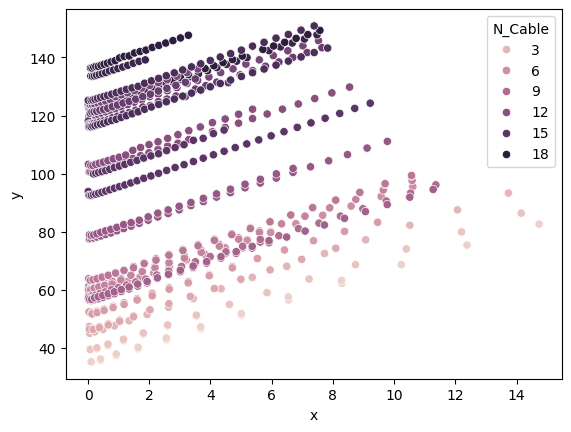

In [ ]:
sns.scatterplot(df_cables,x='x',y='y',hue='N_Cable')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Actividad 5

Preste atención al tipo de datos:

In [ ]:
df_cables.dtypes

fn_Hz               float64
n                     int64
N_Cable               int64
Puente               object
long_m              float64
masa_p_long_kg_m    float64
y                   float64
x                   float64
dtype: object

¡`N_cable` y `Puente` debieran ser variables categóricas! Seamos prolijos con nuestro dataset para no entrar en problemas con `Bambi`.

**Actividad**: Convierta a las variables mencionadas en variables categóricas.

In [ ]:
# CODIGO DEL ALUMNO ############################################################


################################################################################

df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m,y,x
0,5.027848,1,1,C,9.821,3.6,35.110591,0.102327
1,10.131991,2,1,C,9.821,3.6,35.645398,0.409306
2,15.548943,3,1,C,9.821,3.6,37.310680,0.920939
3,21.377890,4,1,C,9.821,3.6,39.671954,1.637225
4,27.748531,5,1,C,9.821,3.6,42.777353,2.558164


In [ ]:
df_cables.dtypes

fn_Hz                float64
n                      int64
N_Cable             category
Puente              category
long_m               float64
masa_p_long_kg_m     float64
y                    float64
x                    float64
dtype: object

### Comparacion entre Cables como Modelo de Cable Ideal

El primer modelo que vamos a construir es uno de cable ideal, donde la rigidez a flexión del mismo es nula. Por lo tanto, $x$ no será una variable predictora. Por otra parte, hay razones para pensar que los cables tienen todos distinta tensión (¿por qué no?).

En particular, vamos a analizar la diferencia entre dos cables, el cable `C10` y el cable `C14`.

#### Actividad 6

**Actividad**: Asumiendo un modelo de generación de datos condicionado al número de cable Normal con desvío estandar igual para todos los cables, obtenga mediante inferencia la tensión de los cables 10 y 14. Indique claramente las distribuciones a priori elegidas, y la verificación de convergencia de la cadena.

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################

model1.build()
model1.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results1 =

################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Distribuciones posteriores
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Hacer predicciones con mi modelo
# CODIGO DEL ALUMNO ############################################################

################################################################################

results1

#### Actividad 7

**Actividad**: Muestre la distribución posterior de la diferencia entre los esfuerzos de los cables. ¿Considera que la diferencia es significativa?

In [ ]:
# CODIGO DEL ALUMNO ############################################################


################################################################################
plt.show()

**Su respuesta**

#### Actividad 8

**Actividad**: Muestre en un mismo gráfico:

- Los datos del Cable 14
- La predicción en función de x
- El intervalo de confianza para el valor medio
- El intervalo de confianza para una nueva observación

¿El modelo se ajusta a los datos observados? ¿O necesitaría evaluar los residuos para confirmar?

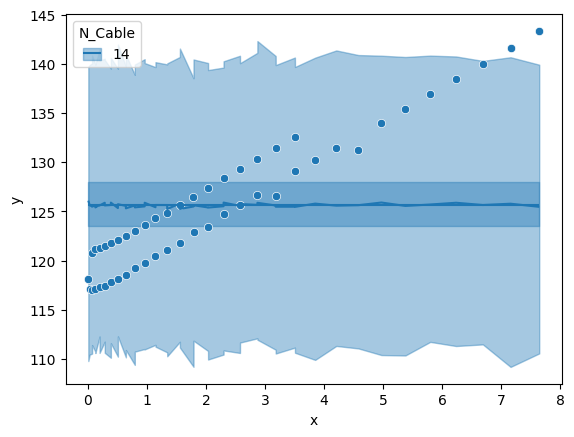

In [ ]:
# CODIGO DEL ALUMNO ############################################################
fig, ax = bmb.interpret.plot_predictions(model1,results1,conditional={'x':np.sort(df_cables[df_cables['N_Cable']==14].x),'N_Cable':[14]},pps=False,prob=0.9)
bmb.interpret.plot_predictions(model1,results1,conditional={'x':np.sort(df_cables[df_cables['N_Cable']==14].x),'N_Cable':14},pps=True,prob=0.9,ax=ax)
sns.scatterplot(data=df_cables[df_cables['N_Cable']==14],x='x',y='y')
################################################################################
plt.show()

**Su respuesta**:

### Comparación entre Cables incluyendo Rigidez a Flexión

El segundo modelo que vamos a construir es uno de cable con rigidez a flexión. La pregunta es, ¿la rigidez a flexión es significativa? y, si lo es, ¿la rigidez a flexión es distinta para cable?

En particular, vamos a analizar la diferencia entre dos cables, el cable `C10` y el cable `C14`.

#### Actividad 9

**Actividad**: Asumiendo un modelo de generación de datos condicionado al número de cable Normal con desvío estandar igual para todos los cables, obtenga mediante inferencia la tensión y la rigidez a flexión de los cables 10 y 14. Indique claramente las distribuciones a priori elegidas, y la verificación de convergencia de la cadena.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model2 =
################################################################################

model2.build()
model2.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results2 =

################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Distribuciones posteriores
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Hacer predicciones con mi modelo
# CODIGO DEL ALUMNO ############################################################

################################################################################

results2

#### Actividad 10

**Actividad**: Muestre la distribución posterior de la diferencia entre los esfuerzos de los cables. ¿Considera que la diferencia es significativa?

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

**Su respuesta**:

#### Actividad 11

**Actividad**: Muestre la distribución posterior de la rigidez a flexión de los cables. ¿Considera su influencia significativa?

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

**Su respuesta**:

#### Actividad 12

**Actividad**: Muestre la distribución posterior de la diferencia entre las rigideces a flexión de los cables. ¿Considera que la diferencia es significativa?

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

#### Actividad 13

**Actividad**: Muestre en un mismo gráfico:

- Los datos del Cable 14
- La predicción en función de x
- El intervalo de confianza para el valor medio
- El intervalo de confianza para una nueva observación

¿El modelo se ajusta a los datos observados?

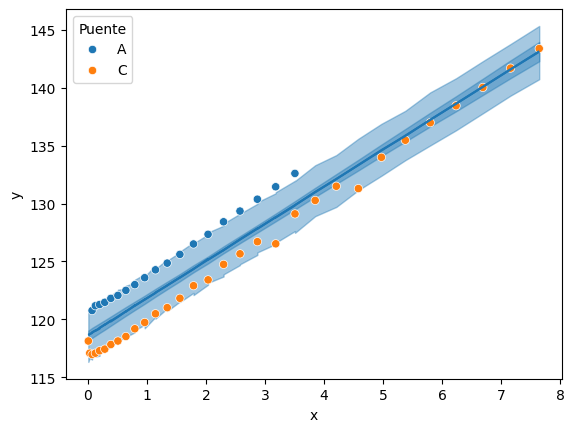

In [ ]:
# CODIGO DEL ALUMNO ############################################################


################################################################################
plt.show()

**Su respuesta**:

### Inclusión del Efecto de la Condición del Puente

En este tercer modelo, vamos a incorporar el efecto de la condición del puente en los esfuerzos de los cables (no así en la rigidez a flexión, ya que es una propiedad intrínseca).

En particular, vamos a analizar la diferencia entre dos cables, el cable `C10` y el cable `C14`.

#### Actividad 14

**Actividad**: Asumiendo un modelo de generación de datos condicionado al número de cable Normal con desvío estandar igual para todos los cables, obtenga mediante inferencia la tensión en función de la condición del peunte y la rigidez a flexión de los cables 10 y 14. Indique claramente las distribuciones a priori elegidas, y la verificación de convergencia de la cadena.

Para elegir la modelización de la rigidez a flexión, utilice las conclusiones de la Actividad 8

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model3 =
################################################################################

model3.build()
model3.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results3 =

################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Distribuciones posteriores
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

In [ ]:
# Hacer predicciones con mi modelo
# CODIGO DEL ALUMNO ############################################################

################################################################################

results3

#### Actividad 15

**Actividad**: Muestre la distribución posterior de la diferencia entre los esfuerzos de cada cable según la condición del puente. ¿Considera que la diferencia es significativa?

$$T_{10,abierto}-T_{10,cerrado}$$

$$T_{14,abierto}-T_{14,cerrado}$$

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

**Su respuesta**:

#### Actividad 16

**Actividad**: Muestre la distribución posterior de la diferencia entre los esfuerzos de los cables para cada condición del puente. ¿Considera que la diferencia es significativa?

$$T_{14,abierto}-T_{10,abierto}$$

$$T_{14,cerrado}-T_{10,cerrado}$$

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

**Su respuesta**:

#### Actividad 17

**Actividad**: Muestre en un mismo gráfico (puede armar 2, uno por cada condición del puente):

- Los datos del Cable 14
- La predicción en función de x
- El intervalo de confianza para el valor medio
- El intervalo de confianza para una nueva observación

¿El modelo se ajusta a los datos observados?

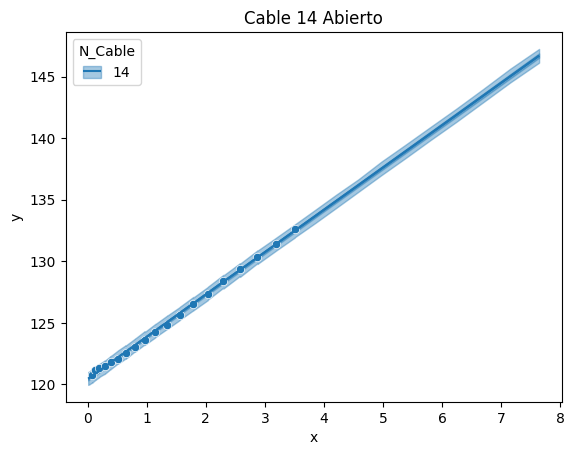

In [ ]:
# CODIGO DEL ALUMNO ############################################################




################################################################################
plt.show()

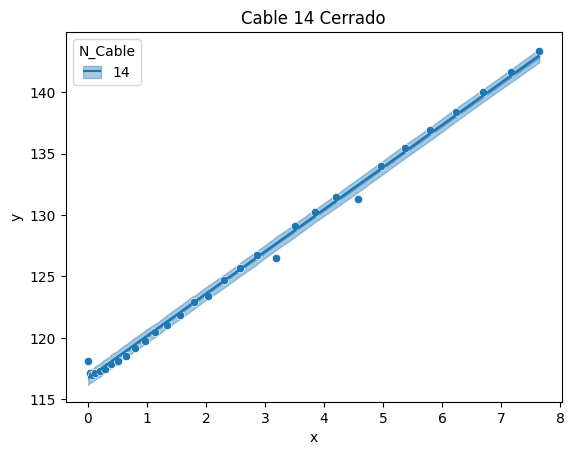

In [ ]:
# CODIGO DEL ALUMNO ############################################################





################################################################################
plt.show()

**Su respuesta**:

### Comparando entre Modelos

Por último, en esta sección nos gustaría ver qué resutlados se fueron obteniendo para cada modelo, enfocándonos en el Cable 14

#### Actividad 18

**Actividad**: Muestre en un mismo gráfico la estimación de la tensión del Cable 14 según cada modelo (Del 1 al 3, ya que en estos mostramos explícitamente como obtener los parámetros). Comente las diferencias.

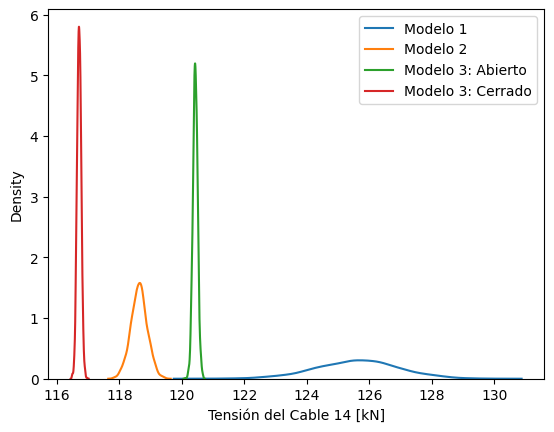

In [ ]:
# CODIGO DEL ALUMNO ############################################################








################################################################################
plt.show()

**Su respuesta**:

#### Actividad 19

**Actividad**: Repita lo anterior para el desvío estándar de los modelos

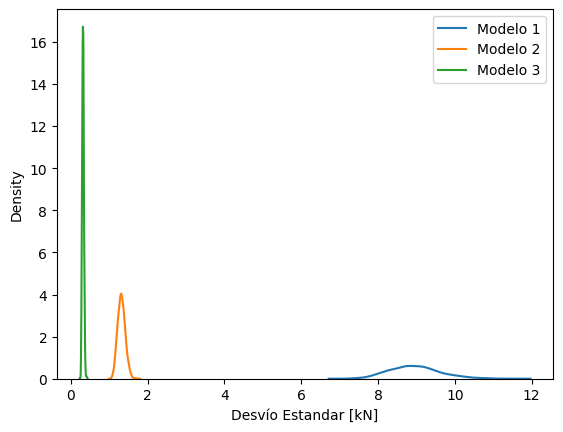

In [ ]:
# CODIGO DEL ALUMNO ############################################################







################################################################################
plt.show()

**Su respuesta**:

#### Actividad 20

**Actividad**: ¿Qué podría implicar que la incertidumbre en los parámetros (y la magnitud del desvío) haya disminuido al incoporporar parámetros? ¿Eso necesariamente implica que el modelo es "mejor"? ¿Qué problema podría encontrarme?

**Su respuesta**:

## Ejercicio 2: Predicción del Período Natural de edificios de hormigón

En este segundo ejercicio vamos a concentrarnos más que nada en la evaluación y selección de modelos, a fines de *tal vez* justificar las ecuaciones presentes en el Reglamento ASCE-7 de Estados Unidos (en el cual se basa la línea CIRSOC Argentina) para estimar el período natural de edificaciones de hormigón. El trabajo original y su propuesta corresponde a Goel y Chopra, 1997 ([Link](https://ascelibrary.org/doi/10.1061/%28ASCE%290733-9445%281997%29123%3A11%281454%29))

### Carga del Dataset



In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving GoelChopraPeriod.csv to GoelChopraPeriod.csv


In [ ]:
#Se crea un DataFrame
df_chopra = pd.read_csv(io.BytesIO(uploaded['GoelChopraPeriod.csv']))
df_chopra.head()

,Structure,No.,Location,ID number,No. of Stories,Height [ft],Width [ft],Length [ft],Ac [sq ft],Ae [%],Earthquake,PGA [g],PGA > 0.15g,Period T [s],Direction
0,RC MRF,1,Emeryville,NaN,30.0,300.0,NaN,NaN,NaN,NaN,Loma Prieta,NaN,No,2.8,Longitudinal
1,RC MRF,2,Los Angeles,NaN,9.0,120.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.4,Longitudinal
2,RC MRF,3,Los Angeles,NaN,14.0,160.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.8,Longitudinal
3,RC MRF,4,Los Angeles,NaN,13.0,166.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.9,Longitudinal
4,RC MRF,5,Los Angeles,ATC_12,10.0,137.5,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.4,Longitudinal


In [ ]:
df_chopra = df_chopra.rename(columns={"Period T [s]": "T_s", "PGA > 0.15g": "PGA","No. of Stories":"N","Height [ft]":"Height"})
df_chopra_red = df_chopra[['T_s','N','Height','Structure','PGA']]

df_chopra_red.head()

,T_s,N,Height,Structure,PGA
0,2.8,30.0,300.0,RC MRF,No
1,1.4,9.0,120.0,RC MRF,No
2,1.8,14.0,160.0,RC MRF,No
3,1.9,13.0,166.0,RC MRF,No
4,1.4,10.0,137.5,RC MRF,No


Como puede ver, el dataset tiene los siguientes datos de interés para este ejercicio:
- Structure : La tipología estructural. A nosotros nos va a impotar `RC MRF` (Estructuras aporticadas de hormigón)
- No. of Stories: Cantidad de pisos
- Height: Altura del edificio en pies
- PGA>0.15g: Indica si el sisma fue de intensidad moderada (en función de la máxima aceleración registrada)
- Period T [s]: El período natural medido en segundos

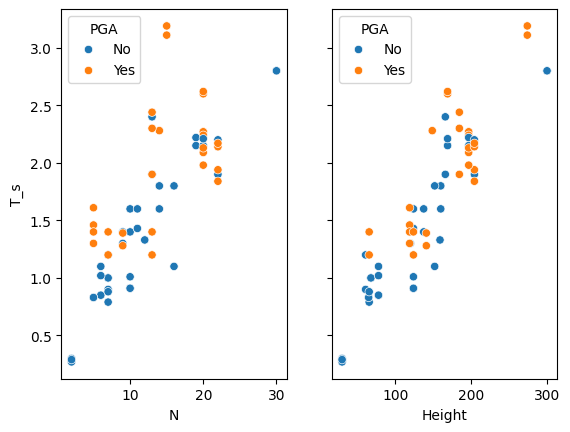

In [ ]:
fig, (axs) = plt.subplots(1, 2)
sns.scatterplot(data=df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna(),x='N',y='T_s',hue='PGA',ax=axs[0])
sns.scatterplot(data=df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna(),x='Height',y='T_s',hue='PGA',ax=axs[1])
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

### Construcción de un modelo Normal

Lo primero que vamos a hacer es contruir un modelo Normal del tipo:

$$y|N \sim N(\mu=aN,\sigma)$$

Es decir, donde el período natural es función del número de pisos con desvíos normales.

#### Actividad 1

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón, marcando claramente las distribuciones a priori adoptadas. Haga la inferencia y confirme que haya convergido, pero no es necesario mostrar más resultados.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_1 =
################################################################################

model_1.build()
model_1.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results_1 =
################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

#### Actividad 2

A continuación se presentan dos gráficos para el análisis de los residuos. El primero presenta la distribución de probabilidad de los residuos. El segundo, la estimación del valor medio del residuo y su desvío para cada punto de la recta (es decir, el primer gráfico en función de N)

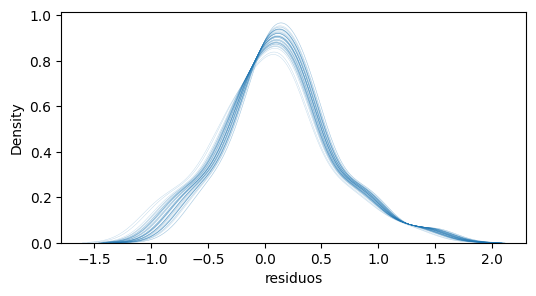

In [ ]:
y_obs = (df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).T_s

fig, ax = plt.subplots( figsize=(6,3) )
for i in range(100,150):
  mu_pred = results_1.posterior["N"].sel(chain=0,draw=i).values * (df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).N
  residuals = y_obs - mu_pred
  sns.kdeplot( residuals, ax=ax, linewidth=.3, alpha=.3, color='C0' )

ax.set_xlabel('residuos')
plt.show()

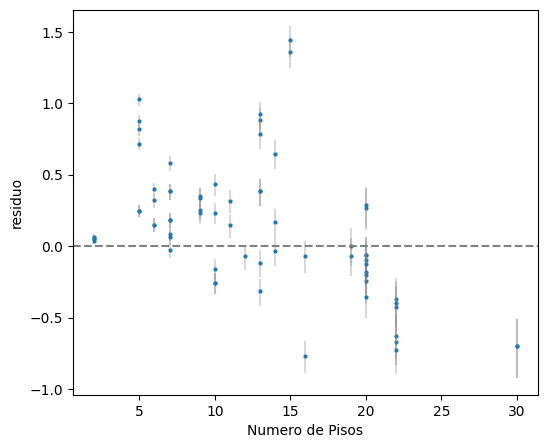

In [ ]:
y_obs = ((df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).T_s).to_numpy()
xx = ((df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).N).to_numpy()

fig, ax = plt.subplots( figsize=(6,5) )

for i in range(len(xx)):
  mu_pred = mu_pred = results_1.posterior["N"].sel(chain=0,draw=slice(1,150)).values * xx[i]
  residuals = y_obs[i] - mu_pred
  quantiles = np.quantile(residuals, 0.05), np.quantile(residuals, 0.95)
  ax.plot( [xx[i],xx[i]], quantiles, color='gray', alpha=.3 )
  ax.plot( xx[i], residuals.mean(), 'o', color='C0', markersize=2)

ax.axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
ax.set_ylabel('residuo')
ax.set_xlabel('Numero de Pisos')
plt.show()

**Actividad**: ¿Puede afirmar que los desvíos siguen la siguiente distribución

$$\sigma \sim N(0,s)$$

con $s$ constante? ¿Por qué? Caso contrario, aclare dónde nota diferencias.

**Su respuesta**:

### Nuevo modelo Normal

Probemos ahora otro modelo normal, con una función para el valor medio similar a la que se encuentra actualmente en el reglamento:

$$y|h \sim N(\log\mu=a+b\cdot \log h,\sigma)$$

Es decir, el valor medio es una recta logaritmica en función de la altura

#### Actividad 3

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón, marcando claramente las distribuciones a priori adoptadas. Haga la inferencia y confirme que haya convergido, pero no es necesario mostrar más resultados.

NOTA: Puede escribir al valor medio como una recta logarítmica indicando `link='log'` al construir el modelo, e indicando que la recta depende del logaritmo de `Height`.

In [ ]:
# CODIGO DEL ALUMNO ############################################################
model_2 =
################################################################################

model_2.build()
model_2.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results_2 =

################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

#### Actividad 4

A continuación se presentan dos gráficos para el análisis de los residuos. El primero presenta la distribución de probabilidad de los residuos. El segundo, la estimación del valor medio del residuo y su desvío para cada punto de la recta (es decir, el primer gráfico en función de h), y el tercero lo repite pero en función del período  observado.

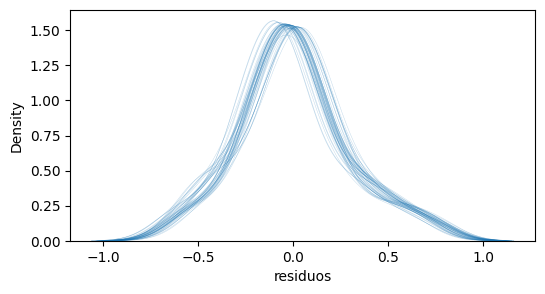

In [ ]:
y_obs = (df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).T_s

fig, ax = plt.subplots( figsize=(6,3) )
for i in range(100,150):
  mu_pred = np.exp(results_2.posterior["Intercept"].sel(chain=0,draw=i).values + results_2.posterior["log(Height)"].sel(chain=0,draw=i).values * np.log((df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).Height))
  residuals = y_obs - mu_pred
  sns.kdeplot( residuals, ax=ax, linewidth=.3, alpha=.3, color='C0' )

ax.set_xlabel('residuos')
plt.show()

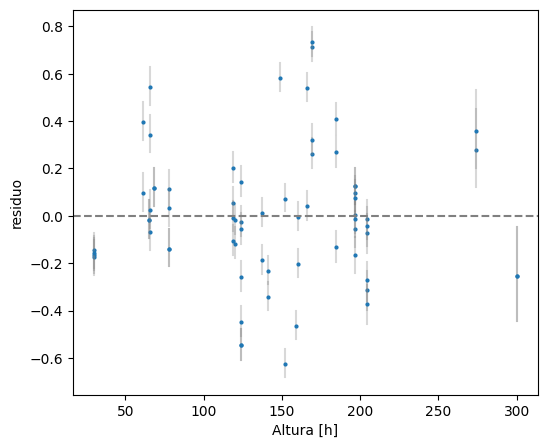

In [ ]:
y_obs = ((df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).T_s).to_numpy()
xx = ((df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).Height).to_numpy()

fig, ax = plt.subplots( figsize=(6,5) )

for i in range(len(xx)):
  mu_pred = np.exp(results_2.posterior["Intercept"].sel(chain=0,draw=slice(1,150)).values + results_2.posterior["log(Height)"].sel(chain=0,draw=slice(1,150)).values * np.log(xx[i]))
  residuals = y_obs[i] - mu_pred
  quantiles = np.quantile(residuals, 0.05), np.quantile(residuals, 0.95)
  ax.plot( [xx[i],xx[i]], quantiles, color='gray', alpha=.3 )
  ax.plot( xx[i], residuals.mean(), 'o', color='C0', markersize=2)

ax.axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
ax.set_ylabel('residuo')
ax.set_xlabel('Altura [h]')
plt.show()

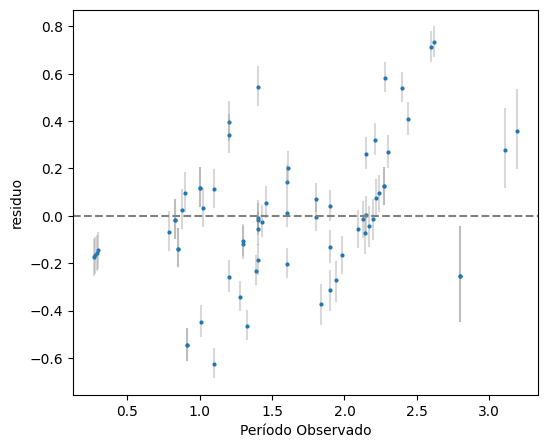

In [ ]:
y_obs = ((df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).T_s).to_numpy()
xx = ((df_chopra_red[(df_chopra_red['Structure']=='RC MRF')].dropna()).Height).to_numpy()

fig, ax = plt.subplots( figsize=(6,5) )

for i in range(len(xx)):
  mu_pred = np.exp(results_2.posterior["Intercept"].sel(chain=0,draw=slice(1,150)).values + results_2.posterior["log(Height)"].sel(chain=0,draw=slice(1,150)).values * np.log(xx[i]))
  residuals = y_obs[i] - mu_pred
  quantiles = np.quantile(residuals, 0.05), np.quantile(residuals, 0.95)
  ax.plot( [y_obs[i],y_obs[i]], quantiles, color='gray', alpha=.3 )
  ax.plot( y_obs[i], residuals.mean(), 'o', color='C0', markersize=2)

ax.axhline( y=0, linestyle='--', color='gray', linewidth=1.5)
ax.set_ylabel('residuo')
ax.set_xlabel('Período Observado')
plt.show()

**Actividad**: ¿Puede afirmar que los desvíos siguen la siguiente distribución

$$\sigma \sim N(0,s)$$

con $s$ constante? ¿Por qué? Caso contrario, aclare dónde nota diferencias.

**Su respuesta**:

### Construcción de un modelo Log-Normal

Finalmente, vamos a probar un modelo Log-Normal, como el que usaron Goel y Chopra.

$$y|h \sim LN(\mu = a+b\cdot \log h,\sigma)$$

Es decir, que en vez del desvío ser constante, el coeficiente de variación lo es (el desvío crece aproximadamente linealmente con el período).

#### Actividad 5

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón, marcando claramente las distribuciones a priori adoptadas. Haga la inferencia y confirme que haya convergido, pero no es necesario mostrar más resultados.

NOTA: Van a tener que definir ad-hoc la familia log-normal como se vio en clase.

In [ ]:
# CODIGO DEL ALUMNO ############################################################













model_3 =
################################################################################

model_3.build()
model_3.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results_3 =

################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

### Comparando los Últimos dos Modelos

#### Actividad 6

**Actividad**: Construya para los últimos dos modelos un gráfico (2 en total) que contengan:

- Los Datos (identificando los de sismos fuertes)
- La predictiva del período con el intervalo de confianza 68% en función de la altura

¿Qué modelo pareciera ser más apropriado a los datos y su dispersión? ¿Nota algún posible punto de mejora?

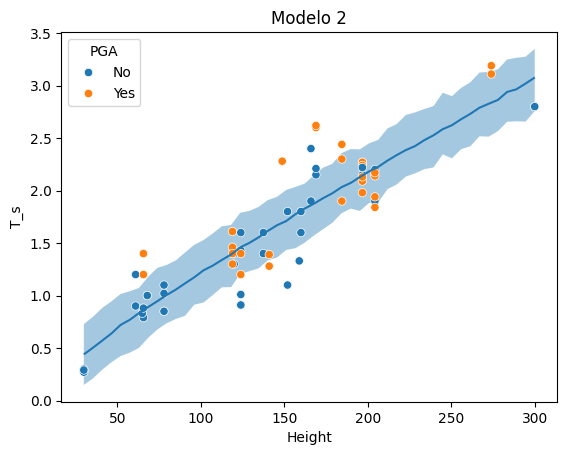

In [ ]:
# CODIGO DEL ALUMNO ############################################################





################################################################################

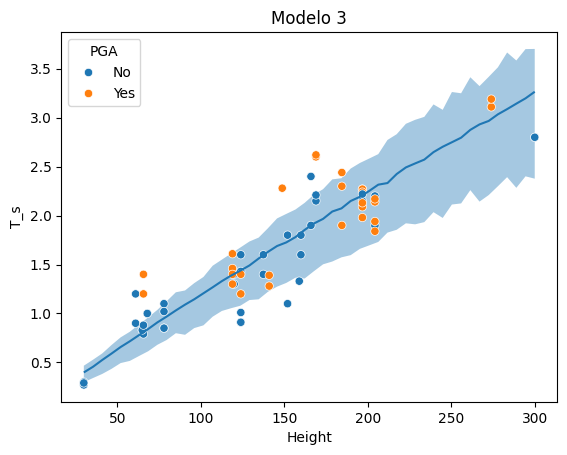

In [ ]:
# CODIGO DEL ALUMNO ############################################################







################################################################################

**Su respuesta**:

### Consideración de la Intensidad del Sismo

Finalmente, vamos a probar un modelo Log-Normal, como el que usaron Goel y Chopra, donde consideraron que la variable $a$ era distinto según el nivel de intesidad del sismo (Yes o No, que significa que la aceleración superó 0.15g o no), debido a la fisuración presente en sismos de mayor magnitud.

$$y|h,PGA \sim LN(\mu = a_{PGA}+b\cdot \log h,\sigma)$$

Construyamos este modelo a ver qué ocurre.

#### Actividad 7

**Actividad**: Construya el modelo anterior únicamente para estructuras aporticadas de hormigón, marcando claramente las distribuciones a priori adoptadas. Haga la inferencia y confirme que haya convergido, pero no es necesario mostrar más resultados.

NOTA: Van a tener que definir ad-hoc la familia log-normal como se vio en clase.

In [ ]:
# CODIGO DEL ALUMNO ############################################################























model_4 =
################################################################################

model_4.build()
model_4.graph()

In [ ]:
# Grafico las distribuciones a priori
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

In [ ]:
# Hago la inferencia estadística
# CODIGO DEL ALUMNO ############################################################
results_4 =

################################################################################

In [ ]:
# Diagnóstico de la Cadena
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

# Resumen de la inferencia
# CODIGO DEL ALUMNO ############################################################

################################################################################

#### Actividad 8

**Actividad**: Compare los resultados en función de PGA, e indique si la diferencia en el período en función de la magnitud del sismo es siginificativa. ¿Se justifica distinguir el ajuste según la intensidad del sismo?

NOTA 1: La inferencia fue realizada sobre el logaritmo del parámetro de intercept.

NOTA 2: En escala lineal, lo lógico sería comparar el cociente, no la resta.



In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################
plt.show()

**Su respuesta**:

### Selección de Modelos

Hasta ahora hemos construido 4 modelos para predecir el período natural de las estructuras de hormigón. ¿Pero con cuál me quedo?

Más allá del diagnóstico realizado anteriormente, el objetivo en esta etapa es seleccionar el modelo tomando como referencia únicamante su capacidad predictiva (Mediante Leave-One-Out-CrossValidation).

#### Actividad 9

**Actividad**: Compare los 4 modelos mediante LOO-CV, y seleccione el mejor modelo en función de su diferencia de capacidad predictiva y otros conceptos que crea importantes (cantidad de parámetros, diagnóstico, etc.)

In [ ]:
# CODIGO DEL ALUMNO ############################################################


az_comp_loo =
################################################################################
az_comp_loo

In [ ]:
# CODIGO DEL ALUMNO ############################################################

################################################################################

**Su respuesta**:

#### Actividad 10:

**Actividad 10**: ¿El modelo que eligió es claramente mejor? Si no lo es, ¿que lo llevó a elegirlo? ¿Por qué cree que Goel y Chopra eligieron el Modelo 4?

**Su respuesta**:

### Uso del modelo

Usted tiene un edificio de 12 pisos (120ft) en California, y quiere conocer su período natural a considerar durante el sismo de diseño (`PGA=Yes`), ya que este influye en las cargas para el cual habrá que diseñarlo.

#### Actividad 11

**Actividad**: Con su modelo seleccionado, obtenga un limite inferior del período natural de su edificio tal que la probabilidad de que ese período sea superado sea de 84%.

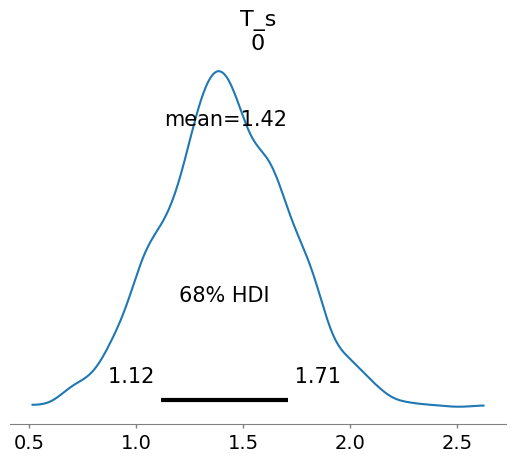

El período de diseño del edificio es de  1.119051205975989 segundos


In [ ]:
# CODIGO DEL ALUMNO ############################################################








T_dis =
################################################################################

print('El período de diseño del edificio es de ',T_dis,'segundos')

#### Actividad 12

**Actividad**: Compare su resultado con la predicción provista por los reglamentos norteamericanos

$$T_{a} = 0.016\cdot h^{0.9}$$

In [ ]:
# CODIGO DEL ALUMNO ############################################################
T_a =

DeltaT =
################################################################################

print('La estimación reglamentaria para el edificio es de ',T_a,'segundos')
print('La diferencia porcentual es de ',DeltaT*100,'%')

La estimación reglamentaria para el edificio es de  1.1895511032079407 segundos
La diferencia porcentual es de  -5.9265967676235185 %


## Ejercicio 3: Aplicación al Dataset del Proyecto Final

Con la entrega de este Trabajo Práctico se debe incluir un pequeño informe de avance (puede ser dentro de este mismo Google Colab) de su Proyecto Final.

Parte de ese informe de avance debe incluir el uso de modelos de regresión para contestar alguna pregunta de sus datos que sea necesaria para continuar con su trabajo. En ese sentido deberán:

1. Identificar una variable **continua** de interés. Si su variable de interés no es continua, elija una que lo sea a fines del ejercicio.
2. Identificar variables predictores para ella en función de un análisis exploratorio de datos
3. Realizar al menos 2 regresiones distintas, haciendo su evaluación y, eventualmente, la selección de la más adecuada en base a su capacidad predictiva.

Es posible que este proceso no se alinie perfectamente con el objetivo de su proyecto integrador. En ese caso, los invitamos a hablar con los docentes para tratar casos especiales ya sea para incorporar al informe otro tipo de ejercicio o hacer de reemplazo.

**Actividad**: Armar un breve informe de avance aplicando algún metodo de regresión a sus datos.

# Impresión del Archivo final (.html)

Para la entrega del TP3, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Restart session and run all`)
2. Descarge el arcihvo .ipynb en su computadora
3. Utilice el arhivo `ImpresionHTML.ipynb` del campus. Le pedirá subir el arhivo que quiere convertir a html y lo hará por ustedes.

Revisé que está todo como les gusta y ¡ya está listo!